__Subject:__      Infering City Population Size from City Data

__Date:__         07/20/2018

__Name:__         Edmund D. Chitwood

***

__Notebook Summary:__<br> 
<br>The following Notebook
-  reads pickled data into DataFrames,
-  combines DataFrames,
-  performs Exploratory Data Analysis,
-  drops series and rows that are unusable in the context of this project,
-  imputes null values with series means,  
-  creates pair plots,
-  and pickles the 'cleaned' DataFrame. 

***

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Load Data

In [2]:
all_cities_a_i = pd.read_pickle('all_cities_pickle_a_i.pkl')
all_cities_j_r = pd.read_pickle('all_cities_pickle_j_r.pkl')
all_cities_s_z = pd.read_pickle('all_cities_pickle_s_z.pkl')

In [3]:
all_cities = pd.concat([all_cities_a_i, all_cities_j_r, all_cities_s_z])

# Exploratory Data Analysis and Clean Up

In [4]:
all_cities.head()

,Annual Precipitation Days,Annual Precipitation Inches,Annual Sunshine Hours,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
0,130.0,39.920,2010.0,14.61,64.0,53.2,A Coruña,190.0,43.365,-8.410,246056,https://en.wikipedia.org/wiki/A_Coru%C3%B1a
1,NaN,32.945,1616.5,62.10,57.6,44.6,Aachen,873.0,50.783,6.083,244951,https://en.wikipedia.org/wiki/Aachen
2,169.3,23.626,NaN,54.00,52.0,39.6,Aalborg,16.0,57.050,9.917,112194,https://en.wikipedia.org/wiki/Aalborg
3,123.0,28.430,1506.0,35.00,52.5,38.8,Aarhus,344.0,56.150,10.217,2,https://en.wikipedia.org/wiki/Aarhus
4,NaN,NaN,NaN,28.00,NaN,NaN,Aba,673.0,5.117,7.367,534265,"https://en.wikipedia.org/wiki/Aba,_Nigeria"


In [5]:
all_cities.shape

(3412, 12)

In [6]:
# Check the number of null values in each series.
count_nan = len(all_cities) - all_cities.count()
print(count_nan)

Annual Precipitation Days      1901
Annual Precipitation Inches    1359
Annual Sunshine Hours          2233
Area                            545
Average High Temp              1342
Average Low Temp               1343
City Name                         0
Elevation                      1264
Latitude                         10
Longitude                        10
Population                      200
URL                               0
dtype: int64


In [7]:
# Drop series where majority of values are null.
all_cities.drop('Annual Sunshine Hours', axis=1, inplace=True)
all_cities.drop('Annual Precipitation Days', axis=1, inplace=True)

In [8]:
# Check for mistakenly parsed population data.
(all_cities.loc[all_cities['Population']<100000]).head()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
3,28.430,35.000,52.5,38.8,Aarhus,344.00,56.15000,10.2170,2,https://en.wikipedia.org/wiki/Aarhus
35,85.772,29.538,86.9,67.3,Agartala,41.99,23.83333,91.2800,2,https://en.wikipedia.org/wiki/Agartala
44,NaN,9.580,82.0,65.5,Bandung,2520.00,-6.91200,107.6097,3,https://en.wikipedia.org/wiki/Bandung
52,38.461,5.000,89.6,67.8,Banjul,0.00,13.45306,-16.5775,31301,https://en.wikipedia.org/wiki/Banjul
177,51.970,98.000,89.0,65.0,Bilaspur,860.00,22.09000,82.1500,3152,"https://en.wikipedia.org/wiki/Bilaspur,_Chhatt..."


In [9]:
(all_cities.loc[all_cities['Population']>100000000]).head()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
5,45.4200,147.70,72.6,49.8,"Fayetteville, North Carolina",263.0,35.05250,-78.87806,2.00564e+08,"https://en.wikipedia.org/wiki/Fayetteville,_No..."
41,22.4138,15.22,58.5,42.4,Ipswich,NaN,52.05944,1.15556,1.57133e+08,https://en.wikipedia.org/wiki/Ipswich
44,25.3740,326.32,82.4,52.7,Irapuato,1724.0,20.66700,-101.35000,3.80942e+11,https://en.wikipedia.org/wiki/Irapuato
105,7.3380,32.00,75.1,51.9,Mazar-i-Sharif,1171.0,36.70000,67.11700,5.77501e+11,https://en.wikipedia.org/wiki/Mazari_Sharif
84,13.4720,NaN,79.2,55.8,Nicosia,720.0,35.16700,33.36700,5.50146e+09,https://en.wikipedia.org/wiki/Nicosia


In [10]:
# Drop mistakenly parsed population data.
all_cities.drop(all_cities[all_cities['Population']<100000].index, inplace=True)
all_cities.drop(all_cities[all_cities['Population']>100000000].index, inplace=True)

In [11]:
# Drop rows where there is no population data. Population is the target of the project.
all_cities = all_cities[all_cities['Population'].notnull()]
all_cities_clean = all_cities.copy(deep=False)

In [12]:
all_cities_clean.shape

(2559, 10)

In [13]:
# Check for mistakenly parsed/outlier area data.
(all_cities_clean.loc[all_cities_clean['Area']<2]).head(20)

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
29,NaN,0.700000,NaN,NaN,"Cambridge, Massachusetts",40.0,42.37361,-71.11056,105162,"https://en.wikipedia.org/wiki/Cambridge,_Massa..."
140,51.008,1.400000,91.9,76.6,Chonburi,30.0,13.36111,100.98500,180000,https://en.wikipedia.org/wiki/Chonburi_(city)
195,54.205,1.258000,76.6,56.1,Concordia,69.0,-31.40000,-58.03300,149450,"https://en.wikipedia.org/wiki/Concordia,_Entre..."
95,NaN,0.160000,NaN,NaN,"Downey, California",118.0,33.93806,-118.13083,111772,"https://en.wikipedia.org/wiki/Downey,_California"
1,NaN,1.110000,NaN,NaN,Haarlem,7.0,52.38300,4.63300,159556,https://en.wikipedia.org/wiki/Haarlem
19,NaN,1.834000,NaN,NaN,Kallithea,82.0,37.95000,23.70000,100641,https://en.wikipedia.org/wiki/Kallithea
1,30.421,1.240000,57.4,43.3,Maastricht,161.0,50.85000,5.68300,121501,https://en.wikipedia.org/wiki/Maastricht
135,NaN,0.200000,NaN,NaN,"Mesquite, Texas",495.0,32.78278,-96.61000,143484,"https://en.wikipedia.org/wiki/Mesquite,_Texas"
40,12.866,1.000000,74.3,54.1,Oran,3.0,35.69694,-0.63306,1.56033e+06,https://en.wikipedia.org/wiki/Oran
38,NaN,1.231577,NaN,NaN,Patos de Minas,2674.0,-18.57889,-46.51778,146416,https://en.wikipedia.org/wiki/Patos_de_Minas


In [14]:
(all_cities_clean.loc[all_cities_clean['Area']>200000]).head()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
18,59.756,260776.0,75.6,63.5,Florianópolis,9.0,-27.61222,-48.48528,477798,https://en.wikipedia.org/wiki/Florian%C3%B3polis


In [15]:
# Drop mistakenly parsed/outlier area data.
all_cities_clean.drop(all_cities_clean[all_cities_clean['Area']>200000].index, inplace=True)
all_cities_clean.drop(all_cities_clean[all_cities_clean['Area']<1.25].index, inplace=True)

In [16]:
# Imputes null values with series means.
all_cities_clean = all_cities_clean.fillna(all_cities_clean.mean())

In [17]:
all_cities_clean.describe()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,Elevation,Latitude,Longitude,Population
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2.417000e+03
mean,37.627009,942.897766,71.937604,53.611716,1320.820849,25.990911,32.136633,8.997984e+05
std,20.527783,4064.647732,10.687103,10.287104,1555.437982,22.452739,76.754231,1.899126e+06
min,0.039000,1.250000,20.800000,11.000000,0.000000,-53.167000,-157.817000,1.000720e+05
25%,26.429000,39.960000,67.600000,48.900000,269.000000,14.550000,-34.977780,1.673000e+05
50%,37.627009,124.000000,71.937604,53.611716,1320.820849,32.525000,35.866670,2.875700e+05
75%,37.627009,942.897766,76.300000,56.500000,1320.820849,41.133000,104.033000,6.633420e+05
max,179.310000,101913.000000,100.600000,86.000000,14500.000000,69.333000,176.167000,3.016550e+07


# Initial Data visualization

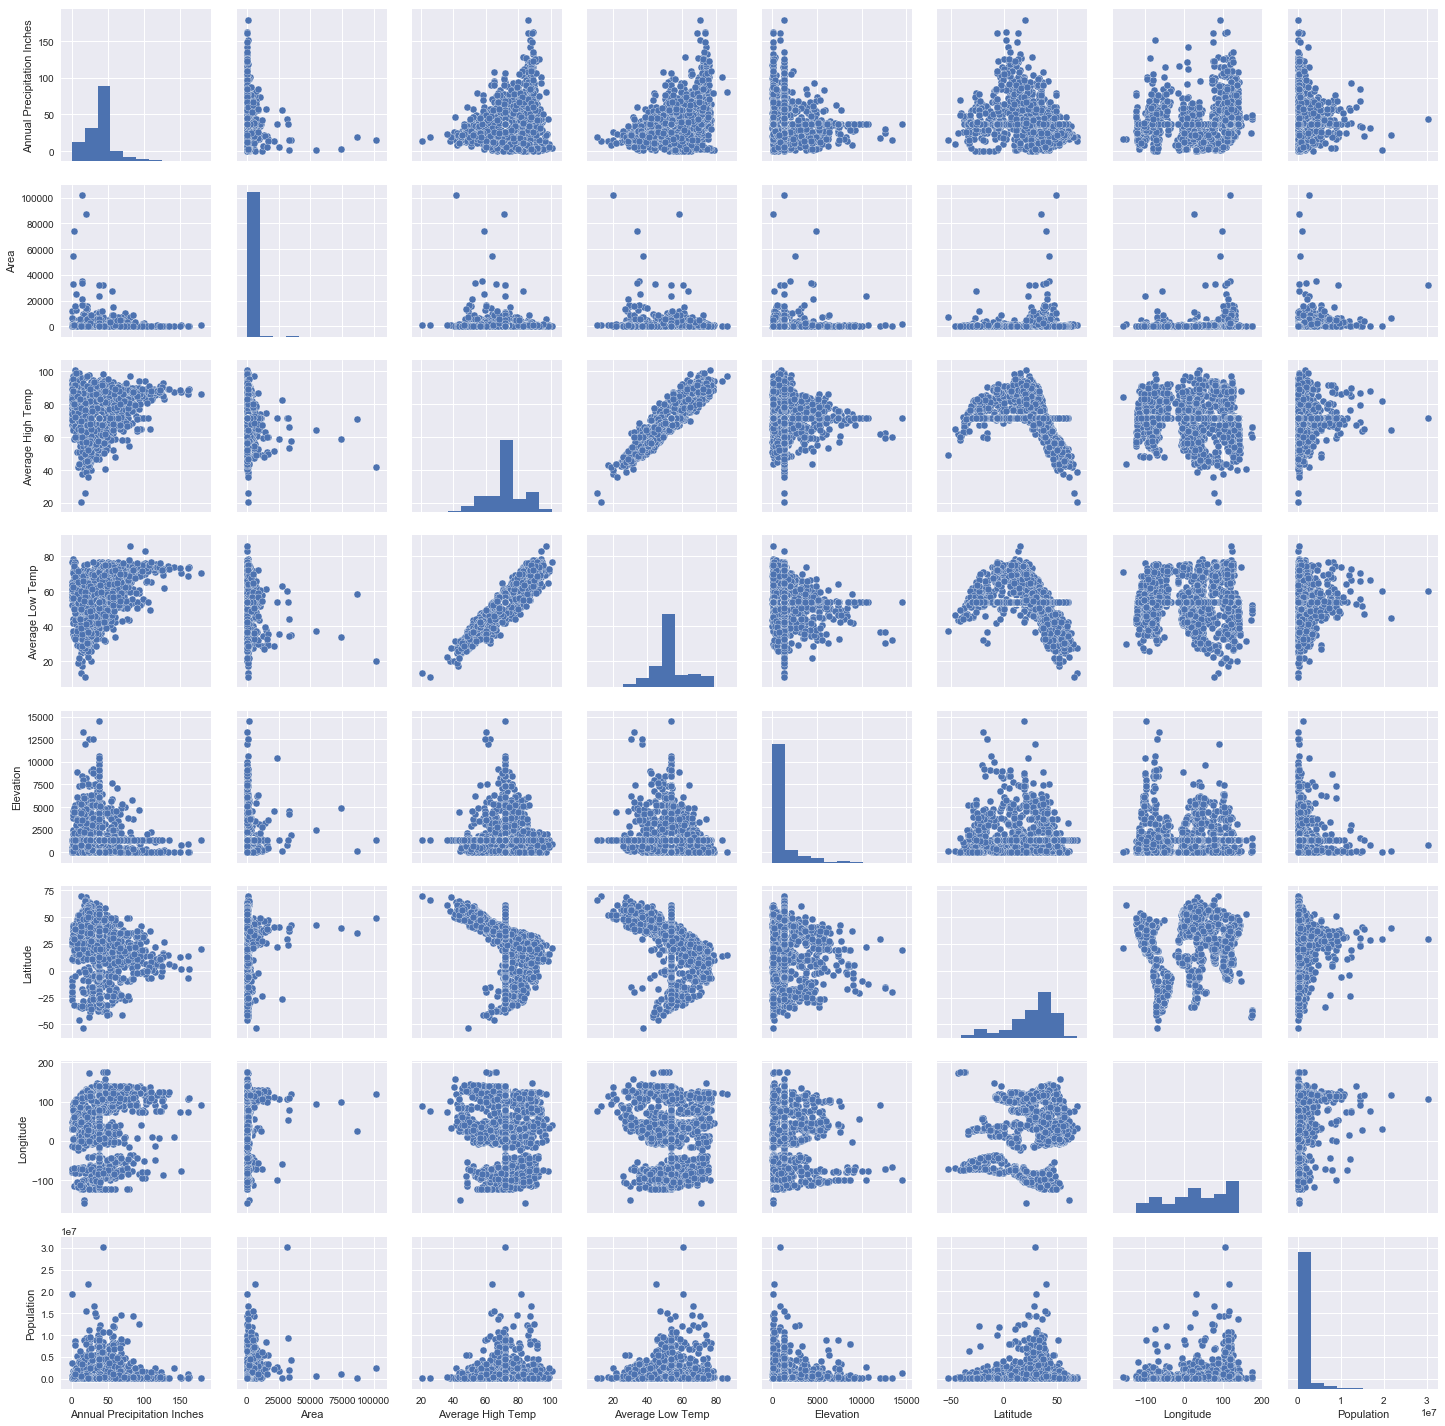

In [18]:
sns.pairplot(all_cities_clean)

# Pickle Clean Data

In [19]:
all_cities_clean.to_pickle('all_cities_clean.pkl')